# How to do a perfect Twitter sentiment analysis using Twitter API

Inspiration: https://medium.com/@dprakash05/twitter-sentiment-analysis-f81f3d24c795

The aim is to analyse and to preprocess the tweets using Twitter API.

The first goal is to analyse individual tweets as positive, negative and neutral.

In this notebook the difference between polarity and subjective is that polarity is a float in the range of -1 to 1. Number 1 means a positive statement and -1 means a negative statement. 

The polarity indicates sentiment with a value from -1 (negative) to 1 (positive). And 0 is neutral. 

It is important to note that subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 

Subjectivity is also a float in the range from 0 to 1. The subjectivity is a value from 0 (objective) to 1 (subjective).

speechemotion environment

## Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                         
plt.style.use('fivethirtyeight')

## Creating Twitter API

In [2]:
# Creating Twitter API: consumerkey, consumersecret, accesstoken, accesstokensecret

consumerkey=''
consumersecret=''
accesstoken=''
accesstokensecret=''

## Authenticate Twitter API

In [3]:
import tweepy
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)
#set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)
#create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

## Accessing tweets
### We are extracting recent 200 tweets of Alex Stubb for analysis.

In [4]:
# The most recent 200 tweets

post=api.user_timeline(screen_name='alexstubb',count=500, tweet_mode='extended')

## Printing 5 recent tweets

In [5]:
# printing 15 recent tweets

print('showing 5 recent tweets: \n')
i=1
for tweet in post[:5]:    
    
        print(str(i)+')'+tweet.full_text + '\n' )
        i+=1

showing 5 recent tweets: 

1)RT @alexstubb: I read the US National Security Strategy with great interest. An excellent document.

Here is my summary of its content. ⁦@W…

2)RT @NorwayMFA: Dear @TwitterSupport, as much as we enjoy our excellent bilateral relations and close alphabetical vicinity with Nigeria, we…

3)RT @alexstubb: I see no reason why Russian athletes should be able to participate in the Olympics for as long as Russia blatantly violates…

4)RT @AtlasMovement: Check out this podcast 🎙️, and the previous episodes with @lisamwitter, @alexstubb, @VictoriaHasson, @ramonalxyu, @Mehdi…

5)Do you want to become a Professor at the @EUI_EU @STGEUI in Florence? 

Well, here is your chance. Check out the opening of 5 Chairs. 

Deadline for applications around mid-January.

Please spread the word.

https://t.co/2MKbi8IwXD



## Extracting english tweets only

In [6]:
# extracting english tweets only

print('showing recent english tweets: \n')
i=1
for tweet in post:
    if i<=5:    
        if tweet.lang=='en':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent english tweets: 

1 ) RT @alexstubb: I read the US National Security Strategy with great interest. An excellent document.

Here is my summary of its content. ⁦@W…

2 ) RT @NorwayMFA: Dear @TwitterSupport, as much as we enjoy our excellent bilateral relations and close alphabetical vicinity with Nigeria, we…

3 ) RT @alexstubb: I see no reason why Russian athletes should be able to participate in the Olympics for as long as Russia blatantly violates…

4 ) RT @AtlasMovement: Check out this podcast 🎙️, and the previous episodes with @lisamwitter, @alexstubb, @VictoriaHasson, @ramonalxyu, @Mehdi…

5 ) Do you want to become a Professor at the @EUI_EU @STGEUI in Florence? 

Well, here is your chance. Check out the opening of 5 Chairs. 

Deadline for applications around mid-January.

Please spread the word.

https://t.co/2MKbi8IwXD



## Extracting finnish tweets only

In [7]:
# extracting finnish tweets only

print('showing recent finnish tweets: \n')
i=1
for tweet in post:
    if i<=5:    
        if tweet.lang=='fi':
            print(str(i),')',tweet.full_text + '\n' )
            i+=1

showing recent finnish tweets: 

1 ) RT @jyrihakamies: @tsusiluoto Tuo muotoilu on oikeasti väljä. Ei nyt anneta yhtään siimaa venäläisille. Jos joskus tilanne on toinen, palat…

2 ) RT @tsusiluoto: Suomen Olympiakomitean kanta venäläisten ja valkovenäläisten osallistumiseen kv-urheiluun on ennallaan eli mielestämme aika…

3 ) RT @Jukka_Manninen: Kai sen keskustan voisi elävöittää ajamalla sinne hiihtoladut?

4 ) RT @MikaAaltola: Olisi hyvä jos Suomessakin katsottaisiin mihin kompastuttiin Venäjän suhteen. Ei tarvitsisi uudestaan kaatua samoihin onge…

5 ) RT @TimoMiettinen: En tiedä, onko tämä erityisen pelottava skenaario vai pikemminkin EU:n perusluonne: vaatimus yksimielisyydestä tietyissä…



## Getting tweets with keyword, hashtags or trending items also insted of some user name 
### Now searching top trending tweets for “Suomi”.

In [13]:
# searching top trending tweets for suomi

cursor=tweepy.Cursor(api.search_tweets,
       q='työttömyysvakuutusmaksu',tweet_mode='extended').items(25)
for i in cursor:   
    print(i.full_text)

@PaavoSinivuori @TapaniKiiski Kyllä minulla ainakin palkkakuitissa on työttömyysvakuutusmaksu ja se on samansuuruinen työnantajalle. AS-korvauksista tulee 5% kassamaksuista, valtio maksaa VERO-varoista peruspäivärahan verran ja loppu tulee em. työttömyysvakuutusmaksuista. Oletko koskaan ollut työttömänä?
@TapaniKiiski Työttömyysvakuutusmaksu on vain vero muiden joukossa. Tasa-arvon pitää olla mahdollisuuksien tasa-arvoa, jokaisen on mahdollista siirtyä tasa-arvottomuudesta tasa-arvoon tässä asiassa.
@Rybertus @PistolSolja Työttömyysvakuutusmaksu on veroluonteinen. Ei siis käytännössä väliä, onko maksajana valtio vai pakollista maksua keräävä rahasto. Valtion tulisi rahoittaa vain minimiturva (palkan sivukulut alas) ja sen päälle yksilö voi ottaa vapaehtoisia vakuutuksia (vaik työttömyyden varalle)


## Creating dataframe
### Converting all 200 tweets into dataframe, so that we can clean and analyse given tweets

In [14]:
# converting tweets into dataframe

df=pd.DataFrame([tweet.full_text for tweet in post if tweet.lang=='en'], columns=['Tweets'])
df.tail(10)

,Tweets
149,"RT @STGEUI: ""It becomes necessary to criticall..."
150,Our customary Wednesday ⁦@STGEUI⁩ Talks in act...
151,Excellent initiative by the ⁦@EU_Commission⁩. ...
152,Nice to see two legendary Finnish politicians ...
153,I think this is big. Strengthens the base case...
154,In Brussels yesterday:\n\nBrussels summit disc...
155,RT @stats_feed: Top 15 cleanest cities in the ...
156,I really like these late evening flights... ht...
157,RT @EvaMaydell: Always good to catch up with @...
158,Productive day in Brussels. Meetings in the @E...


In [15]:
df.to_csv('stubb200tweets07122021.csv')

## Creating function to clean and remove unwanted text or symbols

In [16]:
# creating function go clean tweets

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
    text=re.sub(r'🦠+','',text)  ## removing sign
    text=re.sub(r':+','',text)  ## removing sign
    text=re.sub(r'"+','',text)  ## removing sign
    text=re.sub(r',+','',text)  ## removing sign
    
  #df=df[~df.Tweets.str.contains('RT')] --> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text
df['Tweets']=df['Tweets'].apply(cleanTxt)   ## applying function
## clean Text
df.tail(10)

,Tweets
149,It becomes necessary to critically investigat...
150,Our customary Wednesday ⁦⁩ Talks in action. To...
151,Excellent initiative by the ⁦_Commission⁩. \n\...
152,Nice to see two legendary Finnish politicians ...
153,I think this is big. Strengthens the base case...
154,In Brussels yesterday\n\nBrussels summit discu...
155,_feed Top 15 cleanest cities in the World \n\...
156,I really like these late evening flights... ht...
157,Always good to catch up with ! \n\nLast time ...
158,Productive day in Brussels. Meetings in the _C...


## Getting subjectivity and polarity

Using cleaned tweets

In [17]:
# Getting subjectivity and polarity using cleaned tweets

from textblob import TextBlob

## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
## show new Dataframe
df.head(15)

,Tweets,Subjectivity,Polarity
0,I read the US National Security Strategy with...,0.875000,0.900000
1,Dear as much as we enjoy our excellent bilat...,0.750000,0.700000
2,I see no reason why Russian athletes should b...,0.381250,-0.012500
3,Check out this podcast 🎙️ and the previous ep...,0.166667,-0.166667
4,Do you want to become a Professor at the _EU ...,0.000000,0.000000
5,I read the US National Security Strategy with ...,0.875000,0.900000
6,. looks at the national security strategy of ...,1.000000,0.000000
7,Now it’s clear that Bosnia 🇧🇦 will be granted...,0.691667,0.250000
8,🤝 Do you want to upgrade your skills as negot...,0.000000,0.000000
9,Pic sent by a friend yesterday. Im in London...,0.000000,0.000000


In [18]:
## Creating function to compute positive, negative and neutral analysis

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head(15)

,Tweets,Subjectivity,Polarity,Analysis
0,I read the US National Security Strategy with...,0.875000,0.900000,Positive
1,Dear as much as we enjoy our excellent bilat...,0.750000,0.700000,Positive
2,I see no reason why Russian athletes should b...,0.381250,-0.012500,Negative
3,Check out this podcast 🎙️ and the previous ep...,0.166667,-0.166667,Negative
4,Do you want to become a Professor at the _EU ...,0.000000,0.000000,Neutral
5,I read the US National Security Strategy with ...,0.875000,0.900000,Positive
6,. looks at the national security strategy of ...,1.000000,0.000000,Neutral
7,Now it’s clear that Bosnia 🇧🇦 will be granted...,0.691667,0.250000,Positive
8,🤝 Do you want to upgrade your skills as negot...,0.000000,0.000000,Neutral
9,Pic sent by a friend yesterday. Im in London...,0.000000,0.000000,Neutral


### Getting negative tweets from dataframe

In [19]:
## negative Tweets in dataframe

df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Tweets,Subjectivity,Polarity,Analysis
2,I see no reason why Russian athletes should b...,0.381250,-0.012500,Negative
3,Check out this podcast 🎙️ and the previous ep...,0.166667,-0.166667,Negative
13,I see no reason why Russian athletes should be...,0.305000,-0.010000,Negative
16,_MacDonald Indeed. Democracy as a form of gove...,0.400000,-0.200000,Negative
19,Not sure I agree. For me democracy is a form ...,0.888889,-0.250000,Negative
23,I think presenting democracy from a business...,0.400000,-0.050000,Negative
26,Nore complicated than that.,1.000000,-0.500000,Negative
39,Juho Kusti Paasikivi Finnish President from 19...,0.660417,-0.072917,Negative
40,Writing a book is bloody painful. Same thing e...,0.633163,-0.087755,Negative
44,The European Union has showed its geopolitical...,0.291250,-0.066250,Negative


### Getting positive  tweets from dataframe

In [20]:
## positive tweets in Dataframe

df[df.Analysis=='Positive']   ## Another way of indexing

,Tweets,Subjectivity,Polarity,Analysis
0,I read the US National Security Strategy with...,0.875000,0.900000,Positive
1,Dear as much as we enjoy our excellent bilat...,0.750000,0.700000,Positive
5,I read the US National Security Strategy with ...,0.875000,0.900000,Positive
7,Now it’s clear that Bosnia 🇧🇦 will be granted...,0.691667,0.250000,Positive
10,Strong words. Hoping they will be followed th...,0.733333,0.433333,Positive
...,...,...,...,...
152,Nice to see two legendary Finnish politicians ...,1.000000,0.800000,Positive
154,In Brussels yesterday\n\nBrussels summit discu...,0.450000,0.250000,Positive
155,_feed Top 15 cleanest cities in the World \n\...,0.500000,0.500000,Positive
157,Always good to catch up with ! \n\nLast time ...,0.347222,0.250000,Positive


### Printing all positive tweets

In [21]:
## printing all positive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1) I read the US National Security Strategy with great interest. An excellent document.

Here is my summary of its content. ⁦…

2) Dear  as much as we enjoy our excellent bilateral relations and close alphabetical vicinity with Nigeria we…

3)I read the US National Security Strategy with great interest. An excellent document.

Here is my summary of its content. ⁦⁩ ⁦⁩ ⁦⁩ ⁦⁩  https//t.co/jE8BmPGMIp

4) Now it’s clear that Bosnia 🇧🇦 will be granted status as an 🇪🇺 candidate country. That’s certainly important although primar…

5) Strong words. Hoping they will be followed through

6)_President The integrity of _EN comes first and foremost.

Today at 1200hrs _EN will vote on the unanimous propos…

7)Rumour has it that there is light snowfall in Finland...Pics please.

8) Thanks. 🙏

9)  Quite right countries which have joined the UN for example have a duty to abide by certain basic universal…

10)  Interesting! Thinking about the dichotomy between governance and values. As already argued by

### Printing all negative tweets

In [22]:
## printing all negative tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Negative'):
        print(str(j)+')'+sortedDF['Tweets'][i])
        print()
        j=j+1

1) I see no reason why Russian athletes should be able to participate in the Olympics for as long as Russia blatantly violates…

2) Check out this podcast 🎙️ and the previous episodes with     …

3)I see no reason why Russian athletes should be able to participate in the Olympics for as long as Russia blatantly violates international law. Part of sanctions is isolation from sport. Actions have consequences. Things can change. But until they do no Olympics for Russia.

4)_MacDonald Indeed. Democracy as a form of governance can be used in all sorts of directions which do not necessarily fit neatly into the slot of liberal values.

5) Not sure I agree. For me democracy is a form of governance.

6)  I think presenting democracy from a business-case perspective is damaging its promotion in the long term. Dem…

7)  Nore complicated than that.

8)Juho Kusti Paasikivi Finnish President from 1946 to 1956 famously said that ”The beginning of all wisdom is acknowledgement of facts”. 

I agree wit

### Plotting word cloud

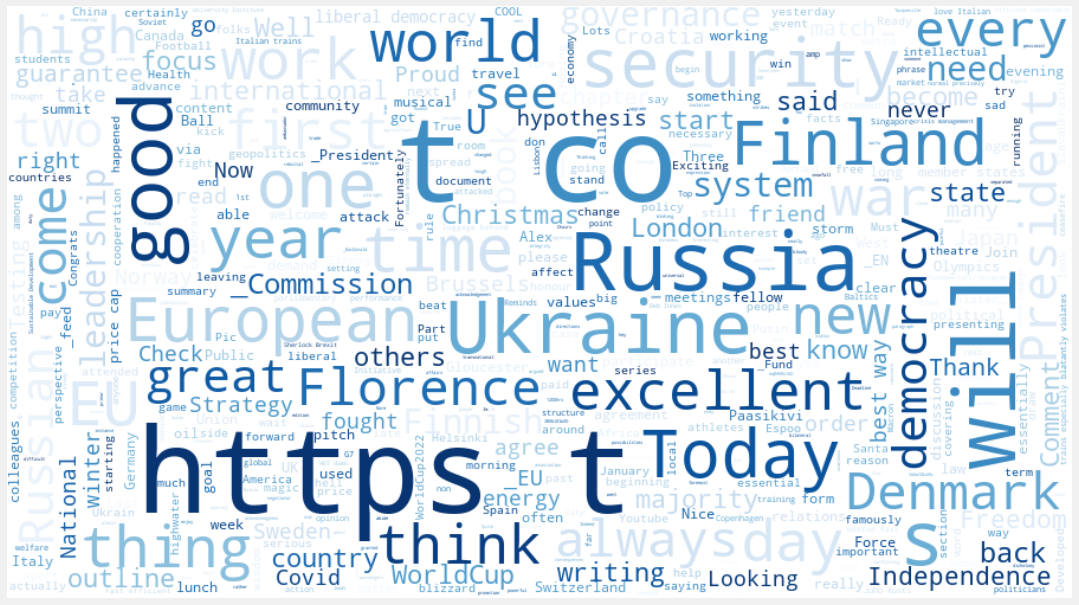

In [23]:
# plotting word cloud

from wordcloud import WordCloud

## plot word Cloud
allWords=' '.join([twts for twts in df['Tweets']])
#wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
#plt.imshow(wordCloud,interpolation='bilinear' )
#plt.axis('off')
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      background_color='white',
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(allWords)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Plotting scatter graph between polarity and subjectivity

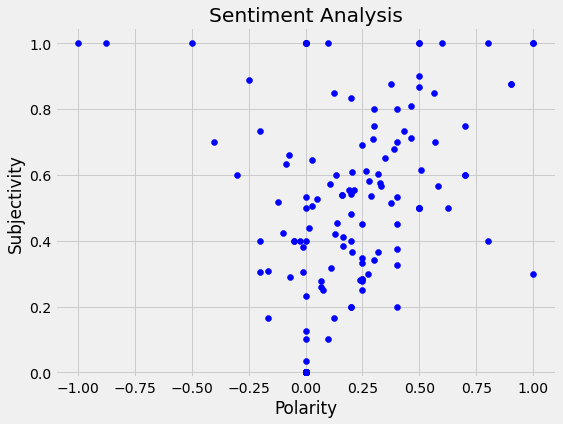

In [24]:
## plotting polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Red dots represent negative tweets, green dots represent positive tweets and remaining blue dots are neutral tweets.

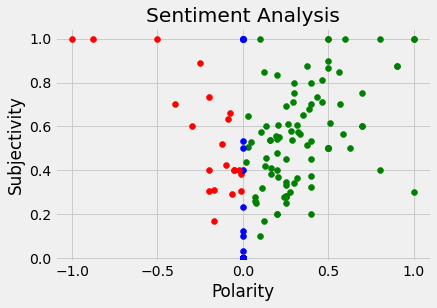

In [25]:
# visualising the sentiment analysis with dots

for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Plotting positive and negative tweets using bar graph

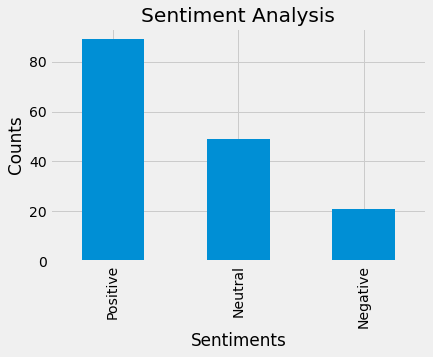

In [26]:
# Positive and negative tweets and plotting bar graph

ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

As you can see, from the above bar graph we can conclude that there are more positive tweets than negative tweets.